<a href="https://colab.research.google.com/github/NdopnnoabasiJames/Machine-Learning-Models/blob/main/Gradient_Boosting_on_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost on Fashion-MNIST (Full Workflow)

In this notebook, we’ll train and evaluate a Gradient Boosting model on the Fashion-MNIST dataset.
The dataset contains 28×28 grayscale images flattened into 784 pixel columns, with separate CSV files for training and testing.

We will follow a full machine-learning workflow:

	1. Import Libraries
	  •	Pandas, NumPy, Matplotlib/Seaborn (for EDA/visualization)
	  •	Scikit-learn modules (GradientBoostingClassifier, train_test_split, metrics)
	2.	Load Dataset
	  •	Load training and test CSV files into pandas DataFrames.
	  •	Check the shape, preview the first few rows.
	3.	Explore the Data
	  •	Check for missing values.
	  •	Inspect label distribution.
	  •	Optional: visualize some images to understand the data.
	4.	Preprocess the Data
	  •	Separate features (X) and labels (y).
	  •	Normalize/scale pixel values to 0–1.
	5.	Train-Test Split (if needed)
	  •	Split training data into a smaller training set and validation set (optional, for tuning).
	6.	Define the Gradient Boosting Model
	  •	Key parameters: n_estimators, learning_rate, max_depth, random_state.
	7.	Train the Model
	  •	Fit the model on the training data.
	8.	Evaluate the Model
	  •	Predict on test data.
	  •	Compute accuracy, classification report, confusion matrix.
	9.	Tune Hyperparameters (optional, if feasible)
	  •	Adjust n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf.
	  •	Use GridSearchCV or RandomizedSearchCV.
	10.	Visualize Results
	  •	Show some test images along with predictions vs true labels.
	  •	Optional: feature importance plot from the model.
	11.	Document and Conclude
	  •	Summarize observations: accuracy, strengths, weaknesses.
	  •	Note what could improve performance further.

## Import Libraries

In [2]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## Load Data

In [3]:
# === Load Data ===
train_df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/fashion-mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/fashion-mnist_test.csv")

## Explore the data

In [4]:
# === Inspect ===
print("Training shape:", train_df.shape)
print("Test shape:", test_df.shape)

print("\nTraining sample:")
print(train_df.head())

print("\nMissing values:")
print(train_df.isnull().sum().head())

Training shape: (60000, 785)
Test shape: (10000, 785)

Training sample:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

  

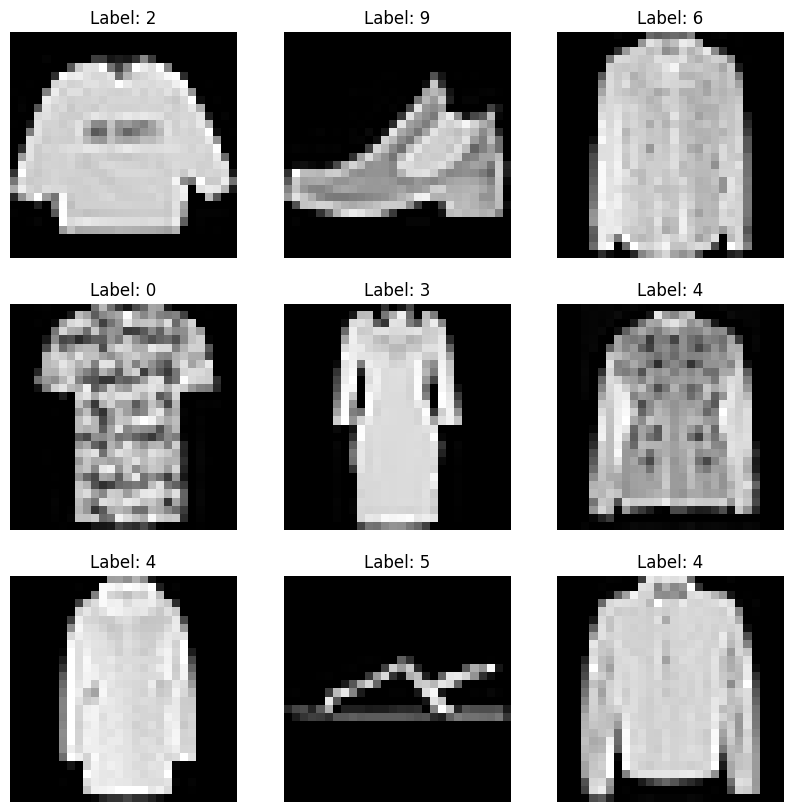

In [5]:
def display_raw_images(df, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        # Extract label
        label = df.loc[i, 'label']
        # Extract pixel data (all columns except 'label')
        pixels = df.loc[i].drop('label').values.reshape(28, 28)
        plt.imshow(pixels, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

display_raw_images(train_df, num_images=9)

## Preprocess the Data

In [6]:
# Separate features and labels
y_train = train_df['label']
X_train = train_df.drop('label', axis=1)

y_test = test_df['label']
X_test = test_df.drop('label', axis=1)

print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Scale pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Scaled pixel range:", X_train.values.min(), "to", X_train.values.max())

Training features shape: (60000, 784)
Training labels shape: (60000,)
Test features shape: (10000, 784)
Test labels shape: (10000,)
Scaled pixel range: 0.0 to 1.0


## Train the Model

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    tree_method='hist'
)

xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

XGBoost Accuracy: 0.907

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.91      0.92      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.99      0.96      0.97      1000
           6       0.76      0.72      0.74      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Visualize Result

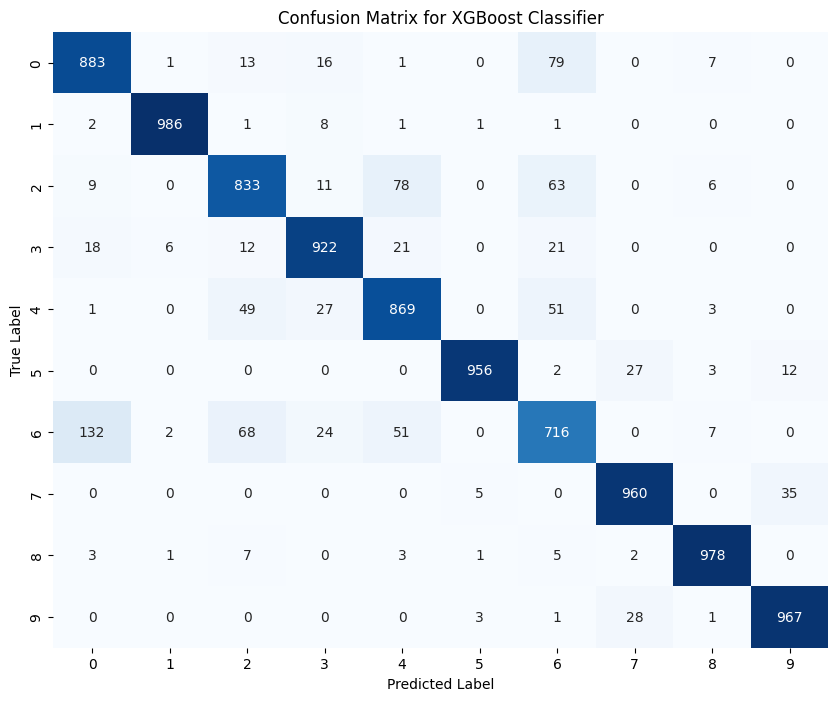

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

## Check Feature Importance

This tells you which features the model relies on the most.

<Figure size 1000x600 with 0 Axes>

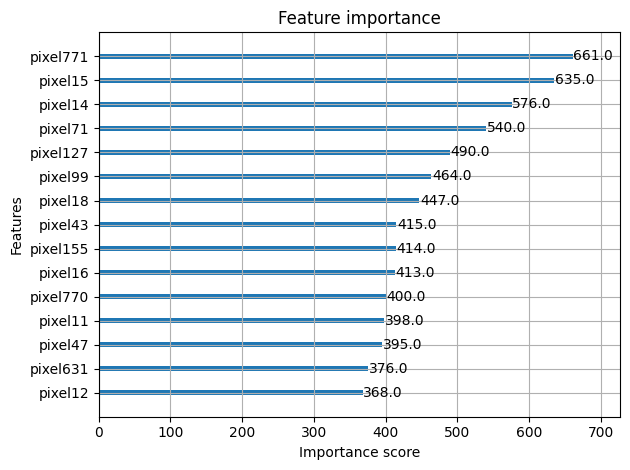

In [8]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=15)
plt.tight_layout()
plt.show()

### Show a few test images with their predictions

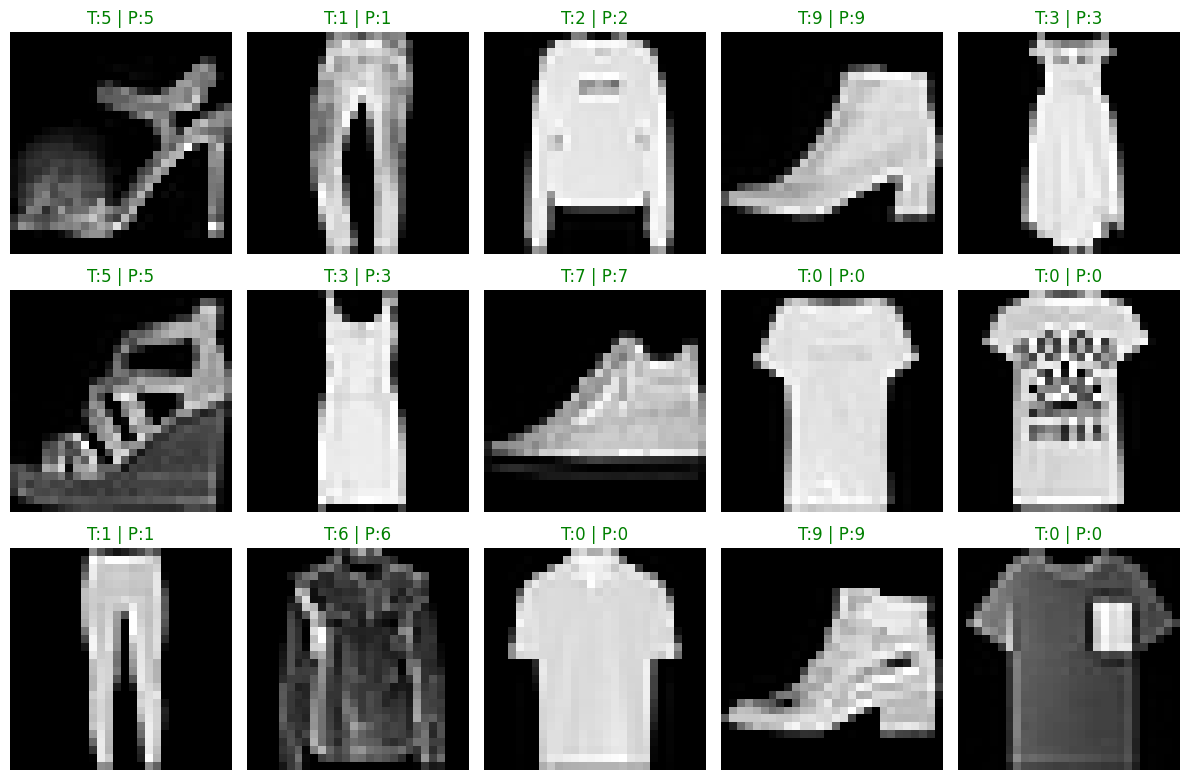

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions (assuming preds are already computed)
# preds = xgb.predict(X_test) # This line is already executed and `preds` exists

# Pick any 15 random images
indices = np.random.choice(len(X_test), 15, replace=False)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    plt.subplot(3, 5, i + 1)

    # Reshape to 28x28 image
    # Use .iloc for positional indexing on X_test DataFrame
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Use .iloc for positional indexing on y_test Series
    true_label = y_test.iloc[idx]
    pred_label = preds[idx]

    title_color = "green" if true_label == pred_label else "red"
    plt.title(f"T:{true_label} | P:{pred_label}", color=title_color)

plt.tight_layout()
plt.show()

The visualization of test images with their predictions has been generated successfully!

You should now see a grid of 15 random images from the test set. Each image is titled with its true label ('T') and the model's predicted label ('P').

The title color indicates the accuracy of the prediction: green for correct predictions and red for incorrect ones. This helps in understanding where the model performs well and where it struggles.

# Conclusion

In this experiment, I applied XGBoost to the MNIST handwritten digit dataset and achieved an accuracy of 90.7% on the test set. The model performed especially well on digits such as 1, 5, 8, and 9, where precision and recall were consistently high. Performance dropped slightly on digits like 0, 2, 4, and particularly 6, indicating that these classes contained more ambiguous or overlapping patterns that the model struggled to separate.

The confusion matrix and sample visualizations showed that many of the errors came from digits with similar shapes. Since XGBoost works on flattened pixel values rather than spatial structures, it cannot fully capture the local patterns present in images. Despite this limitation, the model still produced strong results for a non-deep-learning method.

Overall, XGBoost proved effective for a quick baseline on image data, but it is not the most suitable approach for image classification. Models designed to learn spatial features, such as convolutional neural networks, would be expected to achieve significantly higher performance. Further improvements could come from using CNNs, performing data augmentation, or applying more advanced boosting architectures.

In [13]:
# Finally we can save the trained model for future use without retraining
import joblib

# Save the model
joblib.dump(xgb, 'FashionMnist_XBG_model.pkl')

# Load the model later
# model = joblib.load('house_price_model.pkl')

['FashionMnist_XBG_model.pkl']